In [2]:
from google.colab import drive
import pandas as pd

drive.mount("/content/gdrive", force_remount=True)
default_path='/content/gdrive/MyDrive/ESAA 2학기/데이터/'

Mounted at /content/gdrive


In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df= pd.read_csv(default_path + 'data_set_ALL_AML_train.csv')
df.head()

,Gene Description,Gene Accession Number,1,call,2,call.1,3,call.2,4,call.3,5,call.4,6,call.5,7,call.6,8,call.7,9,call.8,10,call.9,11,call.10,12,call.11,13,call.12,14,call.13,15,call.14,16,call.15,17,call.16,18,call.17,19,call.18,20,call.19,21,call.20,22,call.21,23,call.22,24,call.23,25,call.24,26,call.25,27,call.26,34,call.27,35,call.28,36,call.29,37,call.30,38,call.31,28,call.32,29,call.33,30,call.34,31,call.35,32,call.36,33,call.37
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,A,-139,A,-76,A,-135,A,-106,A,-138,A,-72,A,-413,A,5,A,-88,A,-165,A,-67,A,-92,A,-113,A,-107,A,-117,A,-476,A,-81,A,-44,A,17,A,-144,A,-247,A,-74,A,-120,A,-81,A,-112,A,-273,A,-20,A,7,A,-213,A,-25,A,-72,A,-4,A,15,A,-318,A,-32,A,-124,A,-135,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,A,-73,A,-49,A,-114,A,-125,A,-85,A,-144,A,-260,A,-127,A,-105,A,-155,A,-93,A,-119,A,-147,A,-72,A,-219,A,-213,A,-150,A,-51,A,-229,A,-199,A,-90,A,-321,A,-263,A,-150,A,-233,A,-327,A,-207,A,-100,A,-252,A,-20,A,-139,A,-116,A,-114,A,-192,A,-49,A,-79,A,-186,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,A,-1,A,-307,A,265,A,-76,A,215,A,238,A,7,A,106,A,42,A,-71,A,84,A,-31,A,-118,A,-126,A,-50,A,-18,A,-119,A,100,A,79,A,-157,A,-168,A,-11,A,-114,A,-85,A,-78,A,-76,A,-50,A,-57,A,136,A,124,A,-1,A,-125,A,2,A,-95,A,49,A,-37,A,-70,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,88,A,283,A,309,A,12,A,168,A,71,A,55,A,-2,A,268,A,219,M,82,A,25,A,173,A,243,M,149,A,257,A,301,A,78,A,207,A,218,A,132,A,-24,A,-36,A,255,A,316,A,54,A,81,A,101,A,132,A,318,A,325,A,392,P,241,A,193,A,312,A,230,P,330,A,337,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-295,A,-264,A,-376,A,-419,A,-230,A,-272,A,-399,A,-541,A,-210,A,-178,A,-163,A,-179,A,-233,A,-127,A,-205,A,-218,A,-403,A,-152,A,-146,A,-262,A,-151,A,-308,A,-317,A,-342,A,-418,A,-244,A,-439,A,-369,A,-377,A,-209,A,-396,A,-324,A,-191,A,-51,A,-139,A,-367,A,-188,A,-407,A


In [5]:
df.shape

(7129, 78)

* 열에 있는 1~38까지의 번호가 사람 38명을 의미
* 각 행은 한 사람마다 7129개의 유전자 검사 결과를 의미
* call 열의 의미 : P - Present, A - Absent, M - Marginal

In [6]:
df1 = [col for col in df.columns if "call" not in col]
df = df[df1]
df.head()

,Gene Description,Gene Accession Number,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,34,35,36,37,38,28,29,30,31,32,33
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,-139,-76,-135,-106,-138,-72,-413,5,-88,-165,-67,-92,-113,-107,-117,-476,-81,-44,17,-144,-247,-74,-120,-81,-112,-273,-20,7,-213,-25,-72,-4,15,-318,-32,-124,-135
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,-73,-49,-114,-125,-85,-144,-260,-127,-105,-155,-93,-119,-147,-72,-219,-213,-150,-51,-229,-199,-90,-321,-263,-150,-233,-327,-207,-100,-252,-20,-139,-116,-114,-192,-49,-79,-186
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,-1,-307,265,-76,215,238,7,106,42,-71,84,-31,-118,-126,-50,-18,-119,100,79,-157,-168,-11,-114,-85,-78,-76,-50,-57,136,124,-1,-125,2,-95,49,-37,-70
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,88,283,309,12,168,71,55,-2,268,219,82,25,173,243,149,257,301,78,207,218,132,-24,-36,255,316,54,81,101,132,318,325,392,241,193,312,230,330,337
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-295,-264,-376,-419,-230,-272,-399,-541,-210,-178,-163,-179,-233,-127,-205,-218,-403,-152,-146,-262,-151,-308,-317,-342,-418,-244,-439,-369,-377,-209,-396,-324,-191,-51,-139,-367,-188,-407


In [7]:
df.T.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,7089,7090,7091,7092,7093,7094,7095,7096,7097,7098,7099,7100,7101,7102,7103,7104,7105,7106,7107,7108,7109,7110,7111,7112,7113,7114,7115,7116,7117,7118,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
Gene Description,AFFX-BioB-5_at (endogenous control),AFFX-BioB-M_at (endogenous control),AFFX-BioB-3_at (endogenous control),AFFX-BioC-5_at (endogenous control),AFFX-BioC-3_at (endogenous control),AFFX-BioDn-5_at (endogenous control),AFFX-BioDn-3_at (endogenous control),AFFX-CreX-5_at (endogenous control),AFFX-CreX-3_at (endogenous control),AFFX-BioB-5_st (endogenous control),AFFX-BioB-M_st (endogenous control),AFFX-BioB-3_st (endogenous control),AFFX-BioC-5_st (endogenous control),AFFX-BioC-3_st (endogenous control),AFFX-BioDn-5_st (endogenous control),AFFX-BioDn-3_st (endogenous control),AFFX-CreX-5_st (endogenous control),AFFX-CreX-3_st (endogenous control),hum_alu_at (miscellaneous control),AFFX-DapX-5_at (endogenous control),AFFX-DapX-M_at (endogenous control),AFFX-DapX-3_at (endogenous control),AFFX-LysX-5_at (endogenous control),AFFX-LysX-M_at (endogenous control),AFFX-LysX-3_at (endogenous control),AFFX-PheX-5_at (endogenous control),AFFX-PheX-M_at (endogenous control),AFFX-PheX-3_at (endogenous control),AFFX-ThrX-5_at (endogenous control),AFFX-ThrX-M_at (endogenous control),AFFX-ThrX-3_at (endogenous control),AFFX-TrpnX-5_at (endogenous control),AFFX-TrpnX-M_at (endogenous control),AFFX-TrpnX-3_at (endogenous control),AFFX-HUMISGF3A/M97935_5_at (endogenous control),AFFX-HUMISGF3A/M97935_MA_at (endogenous control),AFFX-HUMISGF3A/M97935_MB_at (endogenous control),AFFX-HUMISGF3A/M97935_3_at (endogenous control),AFFX-HUMRGE/M10098_5_at (endogenous control),AFFX-HUMRGE/M10098_M_at (endogenous control),...,GB DEF = SPR2-1 gene for small proline rich pr...,Metallothionein,GB DEF = Glutamate dehydrogenase,PRSS3 Protease; serine; 3 (trypsin 3),GB DEF = Transmembrane protein Tmp21-IIex,GB DEF = H2B/h gene,ACTB Actin; beta,GAPD Glyceraldehyde-3-phosphate dehydrogenase,CYTOCHROME P450 IA2,Nkat2b mRNA,Natural killer cell receptor (KIR) mRNA,Major Histocompatibility Complex; Class I; C (...,HLA-A MHC class I protein HLA-A (HLA-A28;-B40;...,PRB2 locus salivary proline-rich protein mRNA;...,HLA CLASS II HISTOCOMPATIBILITY ANTIGEN; DQ(W1...,GB DEF = (HLCC85) mRNA for voltage-dependent L...,GB DEF = Endogenous retrovirus clone P1.8 poly...,Integrase gene extracted from Human endogenous...,WUGSC:GS345D13.2 gene (G-protein gamma-1 subun...,TIAL1 TIA1 cytotoxic granule-associated RNA-bi...,Ras-Specific Guanine Nucleotide-Releasing Factor,TYROSINE-PROTEIN KINASE ITK/TSK,(clone p4) 50 kD dystrophin-associated glycopr...,Ifp35 gene extracted from Human BRCA1; Rho7 an...,INHA Inhibin; alpha,S100A9 S100 calcium-binding protein A9 (calgra...,PLGL Plasminogen-like protein,ID1 Inhibitor of DNA binding 1; dominant negat...,ABP1 Amiloride binding protein 1 (amine oxidas...,Transcriptional activator hSNF2b,Transcription factor Stat5b (stat5b) mRNA,Breast epithelial antigen BA46 mRNA,GB DEF = Calcium/calmodulin-dependent protein ...,TUBULIN ALPHA-4 CHAIN,CYP4B1 Cytochrome P450; subfamily IVB; polypep...,PTGER3 Prostaglandin E receptor 3 (subtype EP3...,HMG2 High-mobility group (nonhistone chromosom...,RB1 Retinoblastoma 1 (including osteosarcoma),GB DEF = Glycophorin Sta (type A) exons 3 and ...,GB DEF = mRNA (clone 1A7)
Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,AFFX-BioB-M_st,AFFX-BioB-3_st,AFFX-BioC-5_st,AFFX-BioC-3_st,AFFX-BioDn-5_st,AFFX-BioDn-3_st,AFFX-CreX-5_st,AFFX-CreX-3_st,hum_alu_at,AFFX-DapX-5_at,AFFX-DapX-M_at,AFFX-DapX-3_at,AFFX-LysX-5_at,AFFX-LysX-M_at,AFFX-LysX-3_at,AFFX-PheX-5_at,AFFX-PheX-M_at,AFFX-PheX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-ThrX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at,AFFX-TrpnX-

In [8]:
df = df.T
df2 = df.drop(['Gene Description','Gene Accession Number'],axis=0)
df2.index = pd.to_numeric(df2.index)
df2.tail(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,7089,7090,7091,7092,7093,7094,7095,7096,7097,7098,7099,7100,7101,7102,7103,7104,7105,7106,7107,7108,7109,7110,7111,7112,7113,7114,7115,7116,7117,7118,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
35,7,-100,-57,132,-377,-478,-351,-290,283,247,146,-752,-702,-228,48,180,-141,-233,45492,-26,67,-72,7,-86,76,-55,-177,0,-79,-125,-281,122,-622,-307,-221,-79,45,372,2171,1752,...,420,-853,26,153,278,45,10462,16721,459,228,96,7771,4972,226,2051,-447,67,370,16,228,110,86,161,185,173,55,415,-413,-1959,391,93,336,-45,170,12,752,295,28,1558,-67
36,-213,-252,136,318,-209,-557,40,-243,119,-131,45,-902,-306,-258,465,298,-93,-516,23865,-38,-14,-191,7,-283,27,-131,-190,-32,9,-35,-370,-11,-517,-194,-161,216,227,722,580,130,...,294,119,270,172,616,559,26818,18306,1227,597,-117,16593,15921,536,5627,-331,-21,386,-8,356,27,-3,416,362,203,388,432,-257,-2149,412,234,1653,67,486,-88,1293,342,26,246,23
37,-25,-20,124,325,-396,-464,-221,-390,-1,358,-197,-852,-689,-175,-7,-156,-47,-397,17359,44,286,-73,-11,-272,118,-88,-206,-5,-68,-60,-278,38,-463,-228,10,1287,810,1378,2183,1563,...,239,962,425,418,479,691,17484,16806,1253,328,454,13591,13307,391,2441,-396,-51,228,-50,197,54,74,222,211,99,251,249,-430,-3452,393,146,486,-32,334,35,1733,304,12,3193,-33
38,-72,-139,-1,392,-324,-510,-350,-202,249,561,275,-785,-326,-47,-96,16,-140,-367,19406,113,227,-9,-13,-289,-25,-141,-114,-16,26,-59,-383,141,-588,-188,-74,207,260,720,819,513,...,299,-675,71,255,366,803,11184,16523,1030,236,21,11303,8768,-442,818,-365,-93,202,-91,267,3,20,-139,147,150,130,160,-381,-4082,286,103,1121,102,330,-112,1567,627,21,2520,0
28,-4,-116,-125,241,-191,-411,-31,-240,150,24,19,-669,-664,-311,297,353,-96,-291,17878,21,218,-103,52,-242,134,-105,-207,-42,-59,-39,-183,77,-495,-124,-111,51,132,647,1065,498,...,303,-559,317,585,546,328,16876,13859,1102,375,-105,10547,10235,685,4431,-210,18,403,-31,207,135,86,-228,216,120,247,399,-220,-1651,429,173,755,-23,573,42,987,279,22,662,-46
29,15,-114,2,193,-51,-155,29,-105,42,524,-70,-344,-285,-53,38,-142,-125,-118,26052,-67,121,-69,6,-198,61,-93,-190,-18,-49,-66,-117,-38,-262,-106,-133,-95,-22,202,442,-54,...,99,-17,190,119,390,151,9184,19228,374,61,131,9355,11461,-95,1028,-142,-26,58,-2,113,-30,54,-71,95,59,19,45,-78,-887,314,173,492,54,277,-13,279,51,6,2484,-2
30,-318,-192,-95,312,-139,-344,324,-237,105,167,-50,-820,-231,-273,208,99,-126,-534,11983,-81,114,-67,32,-162,175,-20,-109,31,-23,-21,-246,-31,-589,-353,-314,-435,135,423,45,-450,...,233,12,1034,55,630,1835,21787,15527,385,196,-253,13538,14783,104,3624,-242,-97,386,59,308,32,60,-326,139,-118,247,192,-394,-1634,208,225,737,63,472,33,737,227,-9,371,-31
31,-32,-49,49,230,-367,-508,-349,-194,34,-56,147,-841,-657,-240,-15,227,-166,-453,23508,-126,61,-35,45,-94,125,-125,-171,66,-56,-68,-217,-48,-775,-235,-266,-125,85,295,9042,3852,...,187,-453,338,-39,358,391,21617,17676,852,74,245,10144,9846,190,2633,-230,20,207,-20,132,27,53,-205,319,149,281,306,-442,-2404,385,36,592,57,215,-22,588,361,-26,133,-32
32,-124,-79,-37,330,-188,-423,-31,-223,-82,176,226,-1010,-513,-333,30,177,-69,-411,17996,20,371,-68,6,-134,111,-44,-232,-7,-144,-56,-217,17,-657,-332,-277,-36,123,532,5199,1869,...,385,-1025,705,9230,665,925,24514,14574,1338,67,-56,10373,9002,745,2842,-348,111,330,-19,295,80,109,-54,388,172,292,205,-396,-2525,688,348,938,-15,433,-2,1170,284,39,298,-3
33,-135,-186,-70,337,-407,-566,-141,-315,206,321,233,-946,-909,-507,357,180,-92,-867,19679,18,238,-144,-16,-420,249,-149,-134,-7,-97,-118,-340,7,-806,-261,374,2003,1735,3995,1255,-94,...,564,-1136,197,485,715,-176,18039,15518,1608,403,221,12292,10418,259,2884,-224,66,464,46,238,118,84,-103,545,129,348,477,-193,-2866,248,209,634,-58,375,-23,2315,250,-12,790,-10


In [9]:
df2.sort_index(inplace=True)
df2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,7089,7090,7091,7092,7093,7094,7095,7096,7097,7098,7099,7100,7101,7102,7103,7104,7105,7106,7107,7108,7109,7110,7111,7112,7113,7114,7115,7116,7117,7118,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
1,-214,-153,-58,88,-295,-558,199,-176,252,206,-41,-831,-653,-462,75,381,-118,-565,15091,7,311,-231,21,-107,165,-78,-204,29,-61,-105,-366,-41,-346,-297,-109,-13,215,797,14538,9738,...,391,-763,172,149,341,788,21210,13771,598,396,245,14476,10882,701,2762,-325,-67,346,-68,229,-14,108,28,349,61,273,384,-306,-1827,1582,185,511,-125,389,-37,793,329,36,191,-37
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,19,-743,-239,-83,182,164,-141,-423,11038,37,134,-161,-21,-180,18,-120,-65,97,15,-49,-330,-41,-772,-259,-192,-219,116,433,615,115,...,200,51,154,418,433,736,21059,15097,563,171,-149,13686,11789,76,1567,-191,-88,290,14,194,56,303,-242,214,-28,143,231,-336,-2380,624,169,837,-36,442,-17,782,295,11,76,-14
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,19,-1135,-962,-232,208,432,84,-501,16692,183,378,-221,67,-203,238,-124,-161,36,-23,-80,-481,-65,-620,-269,-136,104,476,1474,5669,3272,...,387,-474,180,272,591,959,24292,17378,1808,363,325,6560,5023,804,1090,-258,9,220,-58,294,95,143,-25,464,513,238,720,-204,-1772,753,315,1199,33,168,52,1138,777,41,228,-41
4,-135,-114,265,12,-419,-585,158,-253,49,31,363,-934,-577,-214,142,271,-107,-101,15763,45,268,-27,43,-52,247,-116,-208,22,-10,-74,-240,-33,-560,-261,-366,-148,155,415,4850,2293,...,317,-336,325,149,173,431,17558,13818,576,455,594,8955,9567,367,1708,-357,45,430,-35,128,42,22,-131,342,142,277,307,-320,-2022,743,240,835,218,174,-110,627,170,-50,126,-91
5,-106,-125,-76,168,-230,-284,4,-122,70,252,155,-471,-490,-184,32,213,1,-260,18128,-28,118,-153,-8,-111,44,-88,-102,32,5,-18,-228,53,-348,-169,-156,-55,122,483,1284,2731,...,162,-56,279,183,259,605,18530,15619,65,122,126,8443,8512,182,1503,-78,29,159,18,71,42,44,-33,159,71,134,178,-182,-179,626,156,649,57,504,-26,250,314,14,56,-25
6,-138,-85,215,71,-272,-558,67,-186,87,193,325,-631,-625,-177,-94,222,-1,-140,34207,65,154,-49,-24,-72,39,-104,-40,40,46,-78,-273,-7,-618,-355,-344,-327,176,412,4148,2743,...,209,-391,302,167,473,184,33638,27972,999,268,405,3632,4214,508,839,-311,46,199,-5,168,48,145,-209,147,376,252,384,-426,-2217,1157,115,1221,-76,172,-74,645,341,26,193,-53
7,-72,-144,238,55,-399,-551,131,-179,126,-20,-115,-1003,-761,-541,109,435,-129,-399,30801,43,80,-87,-8,-250,100,-73,-132,-57,-52,-73,-327,-28,-613,-317,-220,-179,58,383,21573,11031,...,362,-618,379,280,351,211,20531,18708,1828,452,720,9542,7144,835,993,-361,-68,448,-16,317,67,36,546,304,243,349,312,-488,-2300,552,30,819,-178,151,-18,1140,482,10,369,-42
8,-413,-260,7,-2,-541,-790,-275,-463,70,-169,361,-1001,-520,-163,-38,281,-137,-247,25147,338,269,-116,46,-317,265,-130,-212,-233,29,-28,-599,73,-604,-226,-229,-163,257,580,3934,1548,...,235,-1202,215,203,311,-443,17000,11531,848,293,607,15741,11441,1311,3406,-334,56,325,-29,272,106,172,133,428,103,283,445,-556,-3019,572,289,629,-86,302,23,1799,446,59,781,20
9,5,-127,106,268,-210,-535,0,-174,24,506,284,-829,-844,-230,292,172,-59,-323,15272,29,188,-69,74,-217,106,-159,-155,-101,143,-4,-283,47,-383,-196,-106,-100,166,752,13005,7272,...,285,-821,752,182,642,-153,22307,15594,932,437,467,7641,6286,345,1098,-242,-58,293,6,239,-4,143,-129,359,368,292,585,-349,-1439,1776,356,980,6,177,-12,758,385,115,244,-39
10,-88,-105,42,219,-178,-246,328,-148,177,183,-143,-684,-468,-51,233,310,-79,-443,21801,-36,-39,-142,10,-130,-1,-18,-70,-2,2,-9,-264,71,-500,-283,-230,-109,155,606,-163,-213,...,170,1093,233,159,329,334,20357,18398,570,222,216,6039,3584,416,629,-142,-24,298,-13,80,88,22,-82,252,107,292,256,264,-1037,756,42,986,26,101,21,570,359,9,171,7


In [10]:
actual = pd.read_csv(default_path + 'actual.csv')
actual.head()

,patient,cancer
0,1,ALL
1,2,ALL
2,3,ALL
3,4,ALL
4,5,ALL


* AML(Acute Myeloid Leukemia) ; 급성 골수성 백혈병
* ALL(Acute Lymphoblastic Leukemia) : 급성 림프구성 백혈병

In [11]:
actual['cancer'].value_counts()

ALL    47
AML    25
Name: cancer, dtype: int64

In [12]:
df2['cat'] = list(pd.read_csv(default_path + 'actual.csv')[:38]['cancer'])
dic = {'ALL':0,'AML':1}
df2.replace(dic,inplace=True)
df2.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,7090,7091,7092,7093,7094,7095,7096,7097,7098,7099,7100,7101,7102,7103,7104,7105,7106,7107,7108,7109,7110,7111,7112,7113,7114,7115,7116,7117,7118,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128,cat
1,-214,-153,-58,88,-295,-558,199,-176,252,206,-41,-831,-653,-462,75,381,-118,-565,15091,7,311,-231,21,-107,165,-78,-204,29,-61,-105,-366,-41,-346,-297,-109,-13,215,797,14538,9738,...,-763,172,149,341,788,21210,13771,598,396,245,14476,10882,701,2762,-325,-67,346,-68,229,-14,108,28,349,61,273,384,-306,-1827,1582,185,511,-125,389,-37,793,329,36,191,-37,0
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,19,-743,-239,-83,182,164,-141,-423,11038,37,134,-161,-21,-180,18,-120,-65,97,15,-49,-330,-41,-772,-259,-192,-219,116,433,615,115,...,51,154,418,433,736,21059,15097,563,171,-149,13686,11789,76,1567,-191,-88,290,14,194,56,303,-242,214,-28,143,231,-336,-2380,624,169,837,-36,442,-17,782,295,11,76,-14,0
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,19,-1135,-962,-232,208,432,84,-501,16692,183,378,-221,67,-203,238,-124,-161,36,-23,-80,-481,-65,-620,-269,-136,104,476,1474,5669,3272,...,-474,180,272,591,959,24292,17378,1808,363,325,6560,5023,804,1090,-258,9,220,-58,294,95,143,-25,464,513,238,720,-204,-1772,753,315,1199,33,168,52,1138,777,41,228,-41,0


### PCA anaysis

* 주성분분석(PCA)은 차원축소 방법 중 하나로 선형 대수를 사용하여 데이터 집합을 축소된 형태로 변환함.
* PCA는 기존의 변수를 조합하여 서로 연관성이 없는 새로운 변수, 즉 주성분들을 만들어 냄
* 주성분을 만드는 방법 : 데이터를 한 개의 축으로 투영시켰을 때 그 분산이 가장 커지는 축을 첫 번째 주성분, 첫 번째 주성분과 직교하면서 두 번째로 분산이 커지는 축을 두 번째 주성분으로 놓이도록 새로운 좌표계로 데이터를 선형 변환함. 첫번째 이후의 주성분들은 이전의 주성분들과 모두 직교하면서 다음으로 큰 분산을 갖는 축을 선택함.

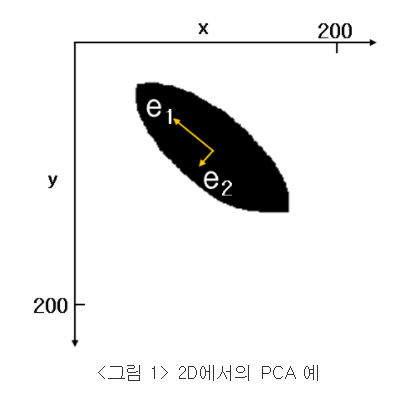
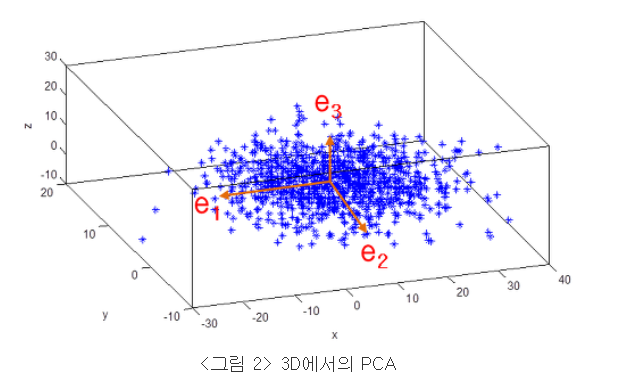

* PCA의 특성은 변환된 결과의 차원 또는 주성분 수를 선택할 수 있다는 것

<주성분 개수 선택 기준>

1) 총변이에 대한 공헌도(공분산 행렬 사용시) : 누적 비율이 70~90%정도인 주성분까지 선택

2) 개별 고유값의 크기(상관계수 행렬 사용시) : 고유값이 1이상인 주성분을 선택 (이때 선택한 주성분의 개수가 총 변이를 적게 설명한다면 0.7 이상인 것을 선택)


3) 스크리 그림(scree plot) 이용 : x축에 주성분을 놓고 y축에 해당 주성분에 대응하는 고유값을 연결한 그림으로 그래프가 완만해지는 부분 이전까지의 주성분을 선택